# LSTM Time Series - Stock Price Prediction
## Part 2 - Data Preprocessing
This notebook focuses on processing the filtered dataset containing the historical prices of Google stocks over the past five years.

> **INPUT**: Filtered dataset containing Google's stock prices from the last five years, obtained from the previous phase. <br/>
> **OUTPUT**: Preprocessed and transformed data divided into training, validation, and testing subsets, stored in an interim location for the training phase.

### 1. INITIALIZATION

In [18]:
# Import necessary libraries and modules
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import joblib
import matplotlib.dates as mdates

In [19]:
# Set output width
pd.set_option("display.width", 120)

### 2. LOADING DATASET

In [20]:
# Prepare data file location and name
data_file_location = "..//data//interim//"
data_file_name = "2025_google_stock_price_recent"
data_file_ext = "csv"

# Load data file
data = pd.read_csv(data_file_location + data_file_name + "." + data_file_ext)

In [21]:
# Check loaded data shape
data.shape

(1535, 7)

In [22]:
# Check loaded data head
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,50.828499,52.616001,50.785500,52.292500,52.105282,30652000
1,2019-01-03,52.049999,52.848999,50.703499,50.803001,50.621113,36822000
2,2019-01-04,51.629501,53.542000,51.370899,53.535500,53.343830,41878000
3,2019-01-07,53.575001,53.700001,52.737999,53.419498,53.228245,39638000
4,2019-01-08,53.805500,54.228001,53.026501,53.813999,53.621330,35298000


In [23]:
# Check columns types
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

### 3. DATA PREPROCESSING

#### Validate Data Types

In [24]:
# Convert date column to a valid Datetime format
data["Date"] = pd.to_datetime(data["Date"])

# Check column types
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

#### Select Independent Features

The objective of this analysis is to implement a multi-variant prediction, taking into account possible impact of several independent features such as the Open price, Close price and Volume on future stock price performance.

Therefore, in this analysis, we will incorporate all the available variables: 
- Opening price
- Highest price
- Lowest price
- Closing price
- Adjusted closing price
- Trading volume

These features will be utilized to forecast the future opening price.

In [25]:
# Define selected features and target attribute
features = ["Open", "High", "Low",	"Close", "Adj Close", "Volume"]
target = "Open"

#### Create Train, Validation, and Test Datasets

To monitor and assess the performance of our model, we will partition the recent stock price dataset into three segments: training, validation, and testing sets.

The division will be structured as follows:
- **Training dataset:** covering the period from the start of 2019 till June, 2023.
- **Validation dataset:** representing the stock prices from July, 2023 till the end of 2023.
- **Testing dataset:** representing the stock prices for the first two months of 2024.

In [26]:
# Define start and end time for each period
train_end_date = pd.to_datetime("2024-05-30")
validate_start_date = pd.to_datetime("2024-06-01")
validate_end_date = pd.to_datetime("2024-10-31")
test_start_date = pd.to_datetime("2024-11-01")
test_end_date = pd.to_datetime("2025-02-09")

# Split dataset into training, validation, and testing
data_train = data[data["Date"] <= train_end_date][features]
data_train_dates = data[data["Date"] <= train_end_date]["Date"]
data_validate = data[(data["Date"] >= validate_start_date) & (data["Date"] <= validate_end_date)][features]
data_validate_dates = data[(data["Date"] >= validate_start_date) & (data["Date"] <= validate_end_date)]["Date"]
data_test = data[(data["Date"] >= test_start_date) & (data["Date"] <= test_end_date)][features]
data_test_dates = data[(data["Date"] >= test_start_date) & (data["Date"] <= test_end_date)]["Date"]

In [27]:
# Display the shape of each dataset
print(f"Training Set: {data_train.shape}")
print(f"Validation Set: {data_validate.shape}")
print(f"Testing Set: {data_test.shape}")

Training Set: (1362, 6)
Validation Set: (116, 6)
Testing Set: (56, 6)


In [28]:
# Display a summary of each dataset
print("Training Dataset:")
print(data_train.head())
print("Validation Dataset:")
print(data_validate.head())
print("Testing Dataset:")
print(data_test.head())

Training Dataset:
        Open       High        Low      Close  Adj Close    Volume
0  50.828499  52.616001  50.785500  52.292500  52.105282  30652000
1  52.049999  52.848999  50.703499  50.803001  50.621113  36822000
2  51.629501  53.542000  51.370899  53.535500  53.343830  41878000
3  53.575001  53.700001  52.737999  53.419498  53.228245  39638000
4  53.805500  54.228001  53.026501  53.813999  53.621330  35298000
Validation Dataset:
            Open        High         Low       Close   Adj Close    Volume
1363  173.880005  175.860001  172.449997  174.419998  173.795547  20742800
1364  174.449997  175.190002  173.220001  175.130005  174.503006  14066600
1365  176.535004  177.970001  175.289993  177.070007  176.436066  15233900
1366  177.429993  178.710007  177.210007  178.350006  177.711472  14255800
1367  178.460007  179.419998  175.789993  175.949997  175.320053  14716300
Testing Dataset:
            Open        High         Low       Close   Adj Close    Volume
1479  175.639999  

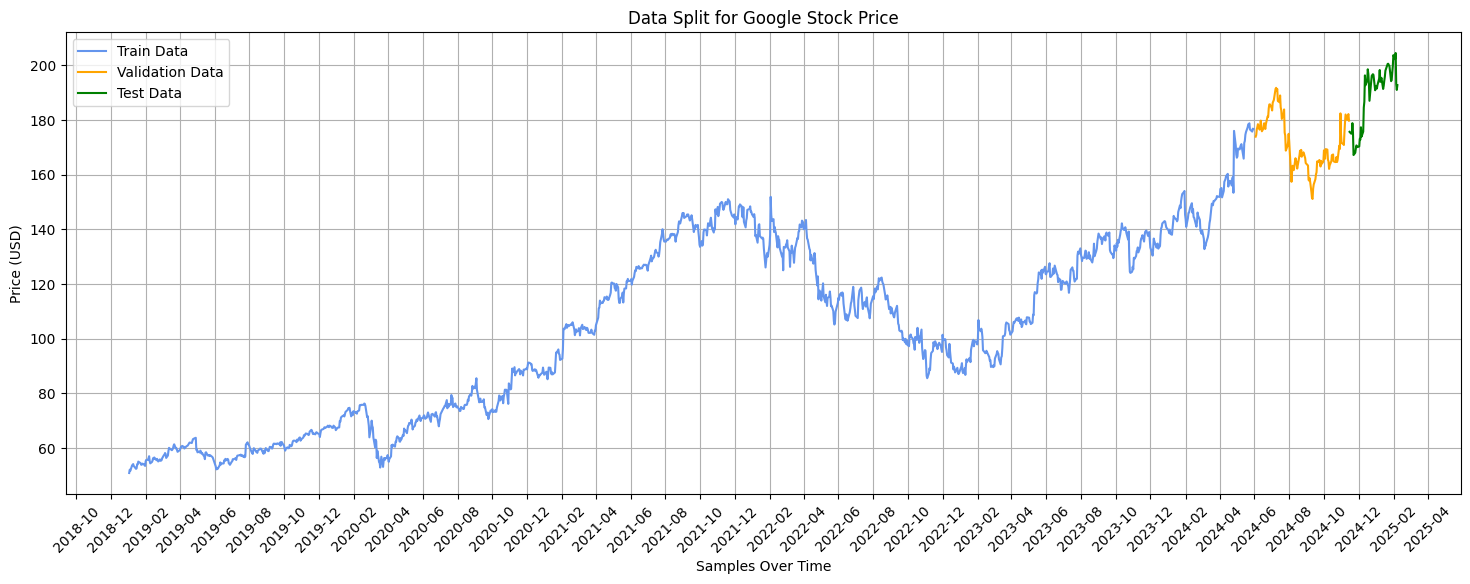

In [29]:
# Plot stock prices for each data split
plt.figure(figsize=(18,6))
plt.plot(data_train_dates, data_train["Open"], color="cornflowerblue")
plt.plot(data_validate_dates, data_validate["Open"], color="orange")
plt.plot(data_test_dates, data_test["Open"], color="green")
plt.legend(["Train Data", "Validation Data", "Test Data"])
plt.title("Data Split for Google Stock Price")
plt.xlabel("Samples Over Time")
plt.ylabel("Price (USD)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)
plt.grid()

#### Data Scaling

In [30]:
# Check the distribution of input features
data[features].describe()

,Open,High,Low,Close,Adj Close,Volume
count,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1.535000e+03
mean,111.138629,112.398131,110.019586,111.227409,110.873004,2.740875e+07
std,38.884015,39.256314,38.528344,38.873259,38.813100,1.265567e+07
min,50.828499,52.374500,50.676800,50.803001,50.621113,6.809800e+06
25%,73.979500,74.775375,73.291000,74.237751,73.971958,1.911390e+07
50%,111.938004,113.664497,110.724297,112.186996,111.785347,2.461700e+07
75%,139.149254,140.409752,137.925003,139.003502,138.505844,3.174590e+07
max,204.500000,208.699997,204.259995,207.710007,207.710007,1.241400e+08


Looking at these details, it's noticeable and anticipated that all price values exhibit similar distributions given they log the price fluctuation on daily basis.

Conversely, the trading volume presents a distinct distribution that differs significantly.

Accordingly, input features need to be transformed into a unified scale and since the distribution doesn't indicate any outliers, we will use the [0,1] range to normalize all features.

To prevent data leakage, we will fit the scaler solely to the training data. Subsequently, we will use this fitted scaler to transform the training, validation, and testing datasets.

In [31]:
# Initialize scaler with range [0,1]
sc = MinMaxScaler(feature_range=(0,1))

# Fit and transform scaler to training set
data_train_scaled = sc.fit_transform(data_train)

# Transform validating and testing datasets
data_validate_scaled = sc.transform(data_validate)
data_test_scaled = sc.transform(data_test)

The scaler employed here will also be utilized in subsequent phases to revert the scaled data back to its original distribution. Therefore, it is essential to save this scaler to a local folder for future use.

In [32]:
# Prepare scaler model name and location
scaler_model_location = "..//models//"
scaler_model_name = "2025_google_stock_price_scaler"
scaler_model_ext = "gz"

# Store scaler model
joblib.dump(sc, scaler_model_location + scaler_model_name + "." + scaler_model_ext)

['..//models//2025_google_stock_price_scaler.gz']

### 4. STORING PROCESSED DATASETS

The training, validation, and testing datasets have been processed and are prepared for training the LSTM model in the next phase.

Prior to saving these datasets, it is necessary to reassemble the dates corresponding to each dataset. This will facilitate later evaluation of the model's performance.

In [33]:
# Combine dates with each corresponding dataset
data_train_scaled_final = pd.DataFrame(data_train_scaled, columns=features, index=None)
data_train_scaled_final["Date"] = data_train_dates.values

data_validate_scaled_final = pd.DataFrame(data_validate_scaled, columns=features, index=None)
data_validate_scaled_final["Date"] = data_validate_dates.values

data_test_scaled_final = pd.DataFrame(data_test_scaled, columns=features, index=None)
data_test_scaled_final["Date"] = data_test_dates.values

In [34]:
# Prepare datasets files and location
data_file_location = "..//data//processed//"
data_file_name_train = "2025_google_stock_price_processed_train"
data_file_name_validate = "2025_google_stock_price_processed_validate"
data_file_name_test = "2025_google_stock_price_processed_test"
data_file_ext = "csv"

# Store datasets
data_train_scaled_final.to_csv(data_file_location + data_file_name_train + "." + data_file_ext, index=None)
data_validate_scaled_final.to_csv(data_file_location + data_file_name_validate + "." + data_file_ext, index=None)
data_test_scaled_final.to_csv(data_file_location + data_file_name_test + "." + data_file_ext, index=None)